# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Amit Shetty </font>

# Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.

The objective of the assignment is to understand how Linear Regression works under the hood without the use of existing libraries. I am using the college admit dataset to figure out how the different attributes of a student's portfolio contribute to their chances of getting an admit into a college of their choice.
One of of figuring out this relations is by the use of Linear Regression.

We will be using two techniques of Linear Regression

a. Least Squares - Useful if the data is small and where the weight needs to be calculated once

b. Least Mean Squares - Useful if data is large by processing the data and calulating data one step at a time and using a leanring rate

Both these techniques will be implemented fro training and testing the data

# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the regression data that you examined in Assignment #0. 

Thsi dataset maps the chances of getting an admit into a Masters program based on several parameters. The parameters included are : 
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [2]:
dataset = pd.read_csv('admit_criteria.csv')

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Removing the serial number as this is an uncessary column
dataset = dataset.drop('Serial No.', axis=1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 8 columns):
GRE Score            7200 non-null int64
TOEFL Score          7200 non-null int64
University Rating    7200 non-null int64
SOP                  7200 non-null float64
LOR                  7200 non-null float64
CGPA                 7200 non-null float64
Research             7200 non-null int64
Chance of Admit      7200 non-null float64
dtypes: float64(4), int64(4)
memory usage: 450.1 KB


Since chance of admit is our target column, based on the correlation matrix below the main factors contributing to it are :
1. GRE Sore (0.8)
2. TOEFL Score (0.79)
3. CGPA (0.87)

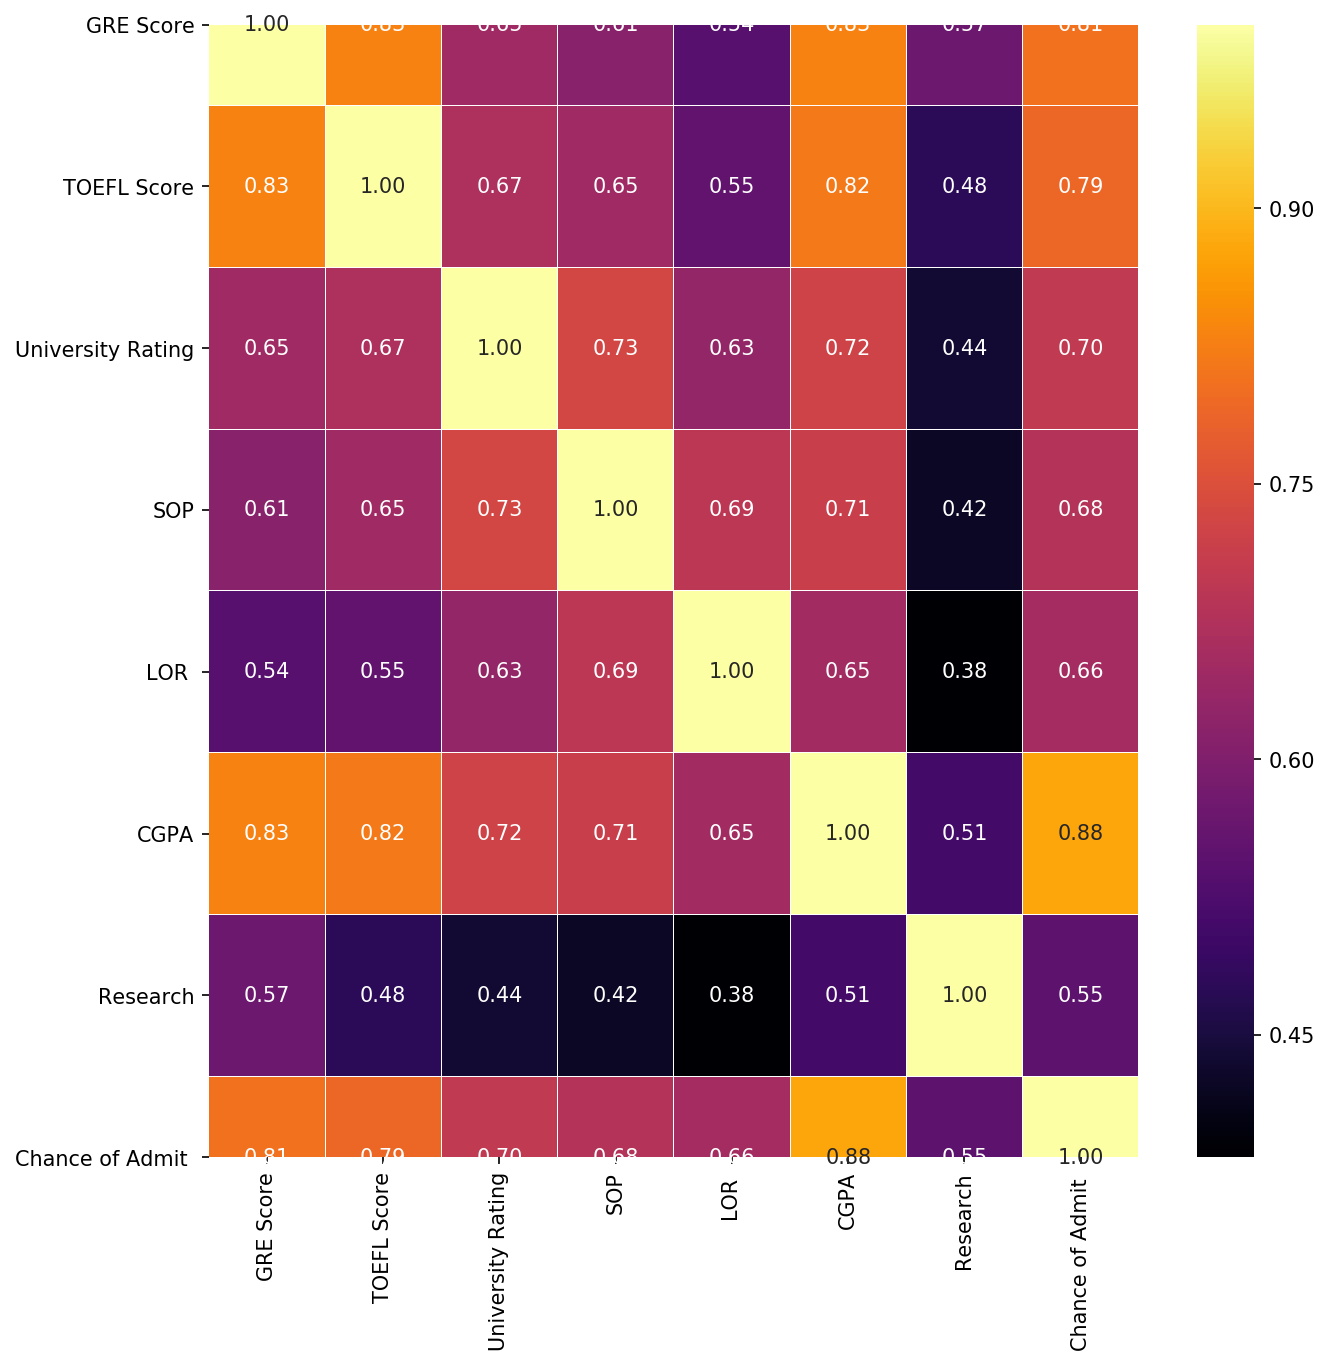

In [6]:
fig,ax = plt.subplots(figsize=(10, 10), dpi=150)
sns.heatmap(dataset.corr(), ax=ax, annot=True, linewidths=0.005, fmt= '.2f',cmap="inferno")
plt.show()

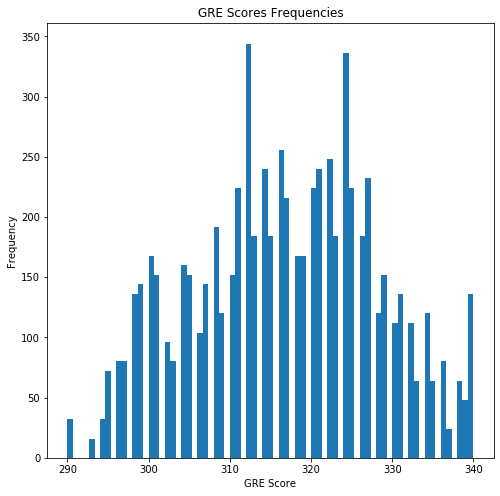

In [7]:
dataset["GRE Score"].plot(kind = 'hist',bins = 75,figsize = (8,8))
plt.title("GRE Scores Frequencies")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
mpl.rcParams['figure.dpi'] = 125
plt.show()

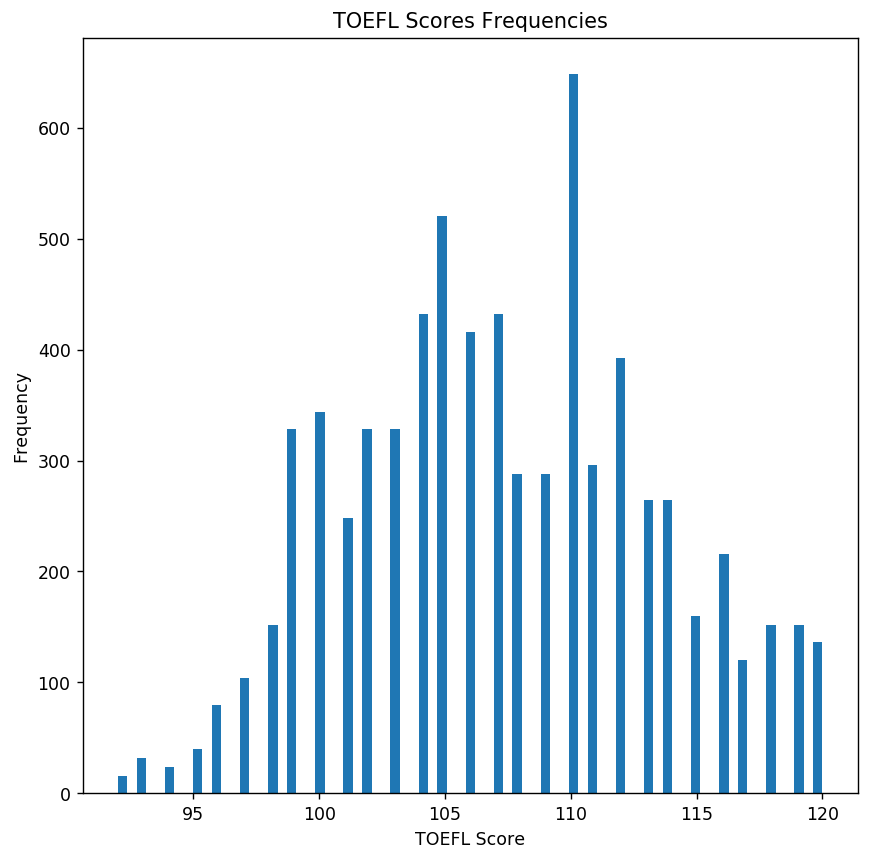

In [8]:
dataset["TOEFL Score"].plot(kind = 'hist',bins = 75,figsize = (8,8))
plt.title("TOEFL Scores Frequencies")
plt.xlabel("TOEFL Score")
plt.ylabel("Frequency")
mpl.rcParams['figure.dpi'] = 125
plt.show()

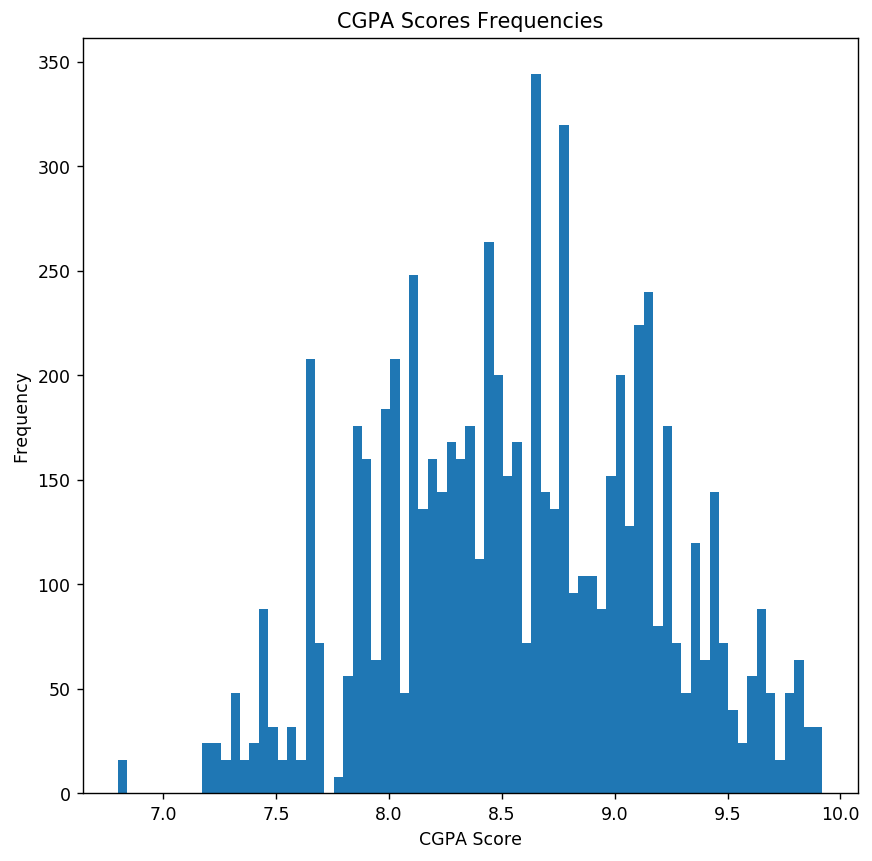

In [9]:
dataset["CGPA"].plot(kind = 'hist',bins = 75,figsize = (8,8))
plt.title("CGPA Scores Frequencies")
plt.xlabel("CGPA Score")
plt.ylabel("Frequency")
mpl.rcParams['figure.dpi'] = 125
plt.show()

One of the columns of interest is the 'Research' column that determines whether a candidate has research experience. From the plot below we can see that there are more candidates that have research experience but as per the correleation matrix, it does not seem to play a very large role in the selection

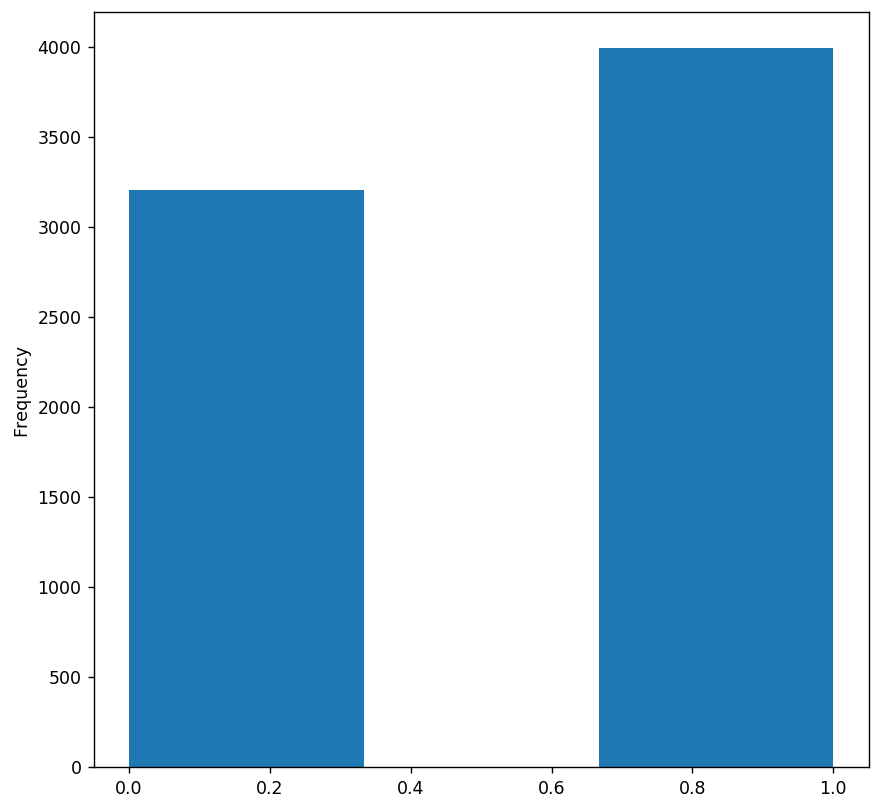

In [10]:
dataset["Research"].plot(kind = 'hist', bins=3, figsize = (8,8))
mpl.rcParams['figure.dpi'] = 125
plt.show()

Based on the histogram below, while having research experience may not be a contributing factor with a low correleation  matrix score, having research experience does increase the chance of getting admitted to a graduate program

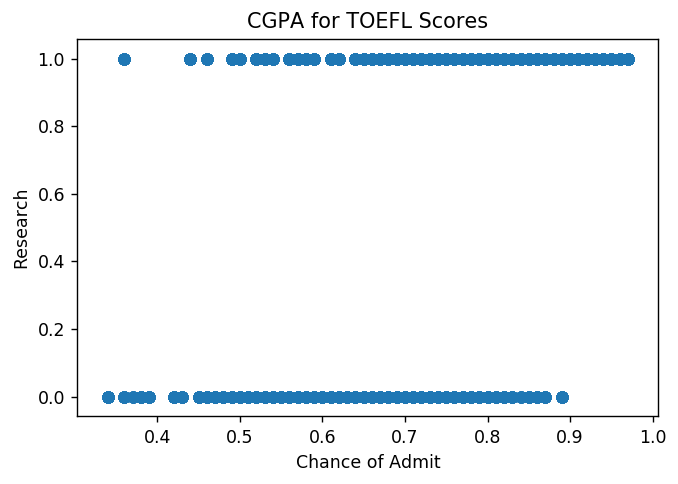

In [11]:
plt.scatter(dataset['Chance of Admit '], dataset["Research"])
plt.title("CGPA for TOEFL Scores")
plt.xlabel("Chance of Admit")
plt.ylabel("Research")
mpl.rcParams['figure.dpi'] = 125
plt.show()

Colleges usually have strict criteria for CGPA when it comes to selecting candidates. However college rating also determine the type of candidates they select. We will see how this affects college ratings.

We can see a clear correlation between university ratings and the CGPA requirements of such candidates. Higher the university rating higher is the CGPA requirement

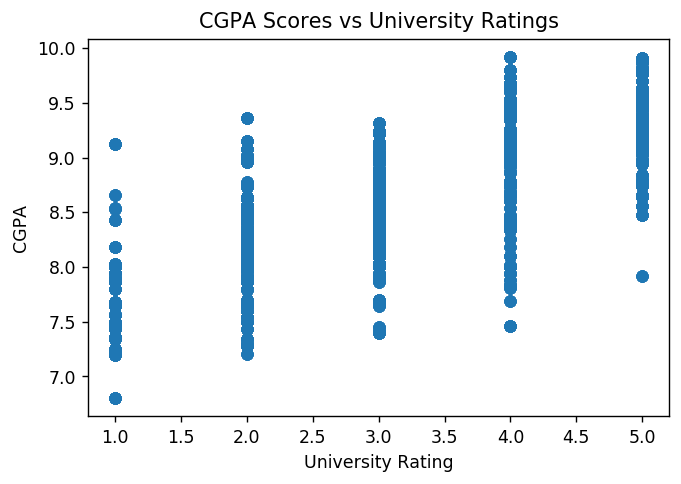

In [12]:
plt.scatter(dataset["University Rating"],dataset['CGPA'])
plt.title("CGPA Scores vs University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
mpl.rcParams['figure.dpi'] = 125
plt.show()

Since CGPA played such an important role was it reflected in their GRE score as well.

Again we see a clear correlation between higher CGPA's leading to better GRE scores

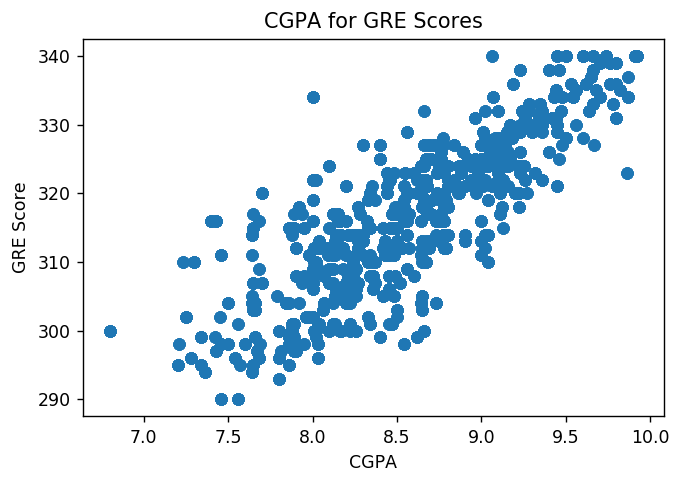

In [13]:
plt.scatter(dataset['CGPA'], dataset["GRE Score"])
plt.title("CGPA for GRE Scores")
plt.xlabel("CGPA")
plt.ylabel("GRE Score")
mpl.rcParams['figure.dpi'] = 250
plt.show()

We can run the same code for TOEFL Scores to confirm the correlation

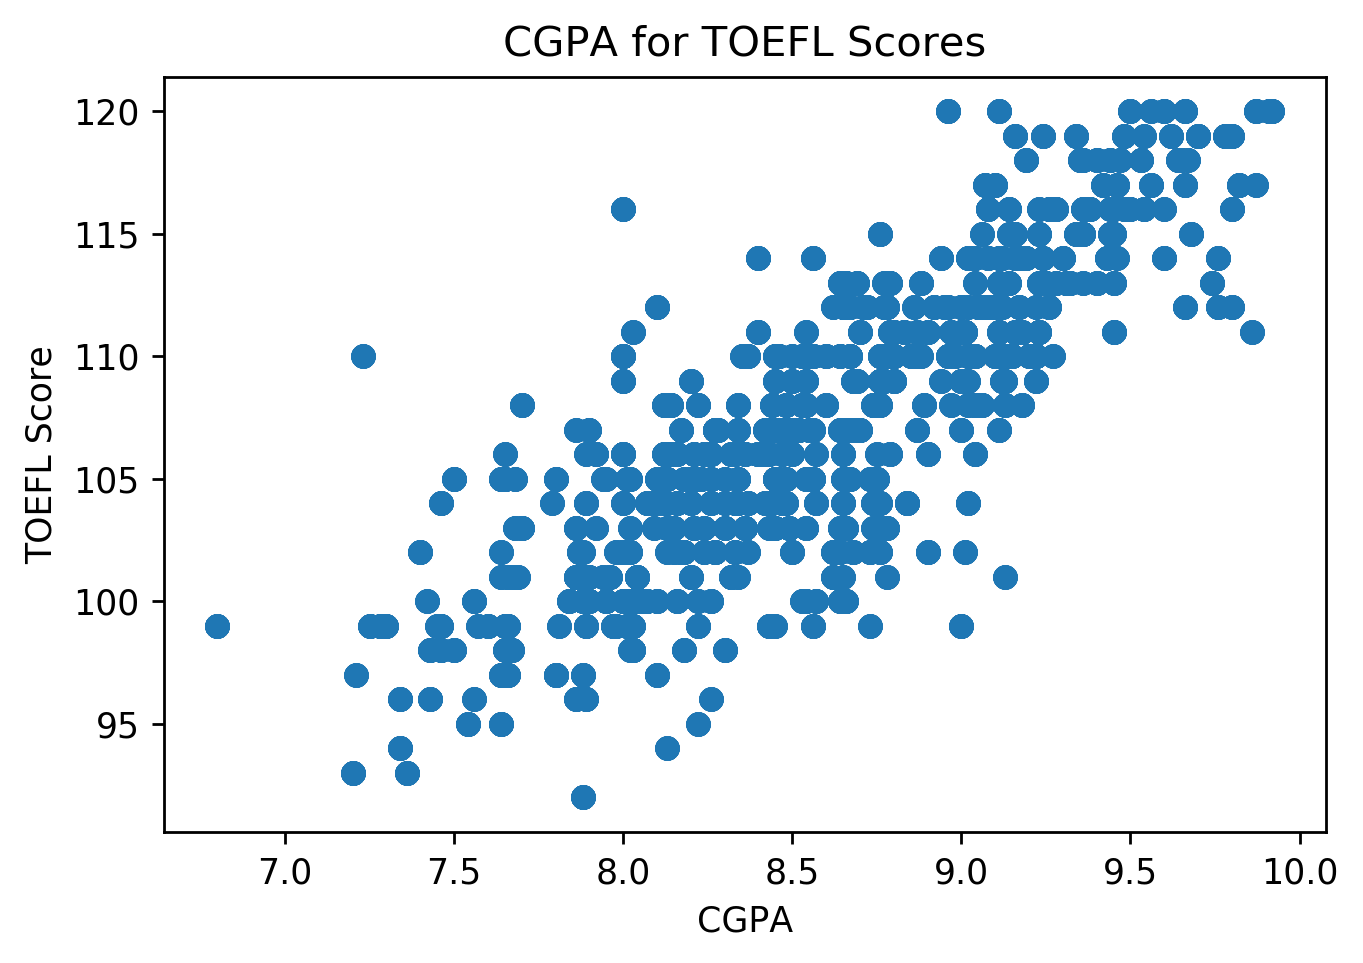

In [14]:
plt.scatter(dataset['CGPA'], dataset["TOEFL Score"])
plt.title("CGPA for TOEFL Scores")
plt.xlabel("CGPA")
plt.ylabel("TOEFL Score")
mpl.rcParams['figure.dpi'] = 250
plt.show()

It is clear from the graph below how important having a good CGPA is to increasing the chances of admit. The same goes for the biggest contribiting fators to increase the chances of admit i.e. GRE score and TOEFL Score

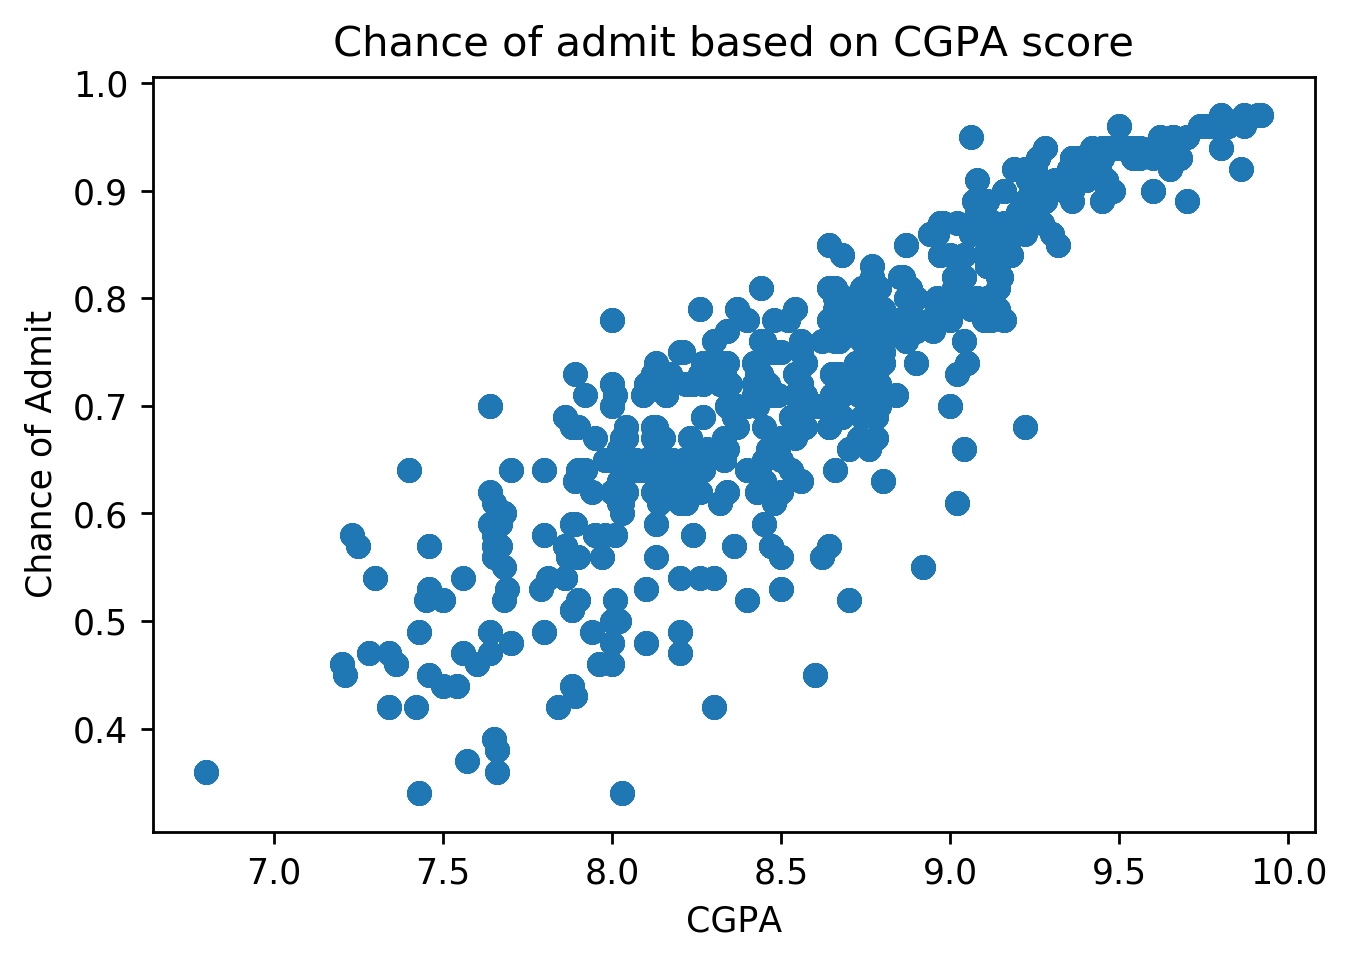

In [15]:
plt.scatter(dataset['CGPA'], dataset["Chance of Admit "])
plt.title("Chance of admit based on CGPA score")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
mpl.rcParams['figure.dpi'] = 250
plt.show()

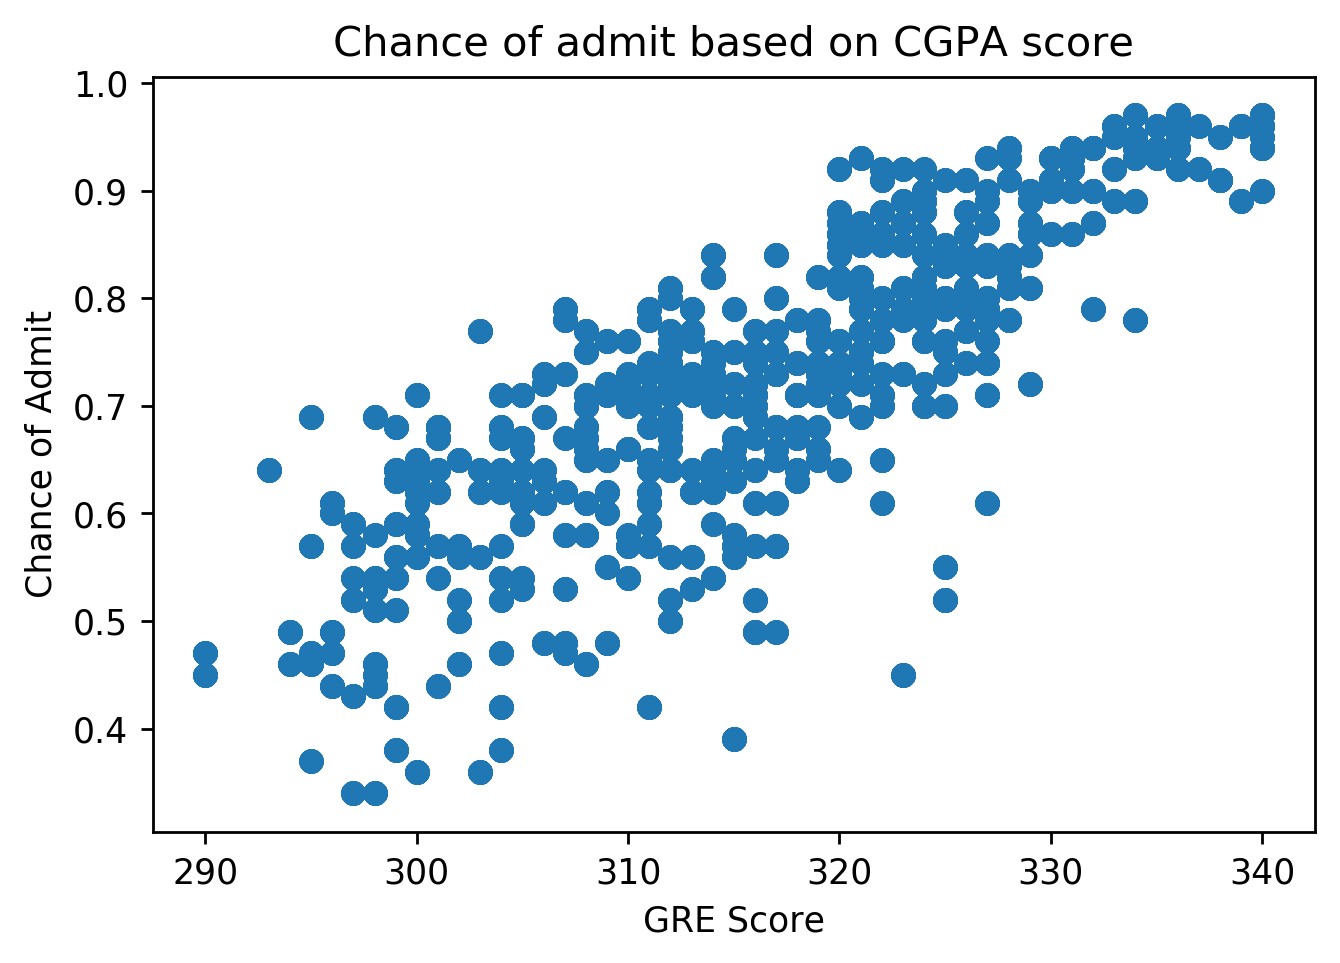

In [16]:
plt.scatter(dataset['GRE Score'], dataset["Chance of Admit "])
plt.title("Chance of admit based on CGPA score")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
mpl.rcParams['figure.dpi'] = 250
plt.show()

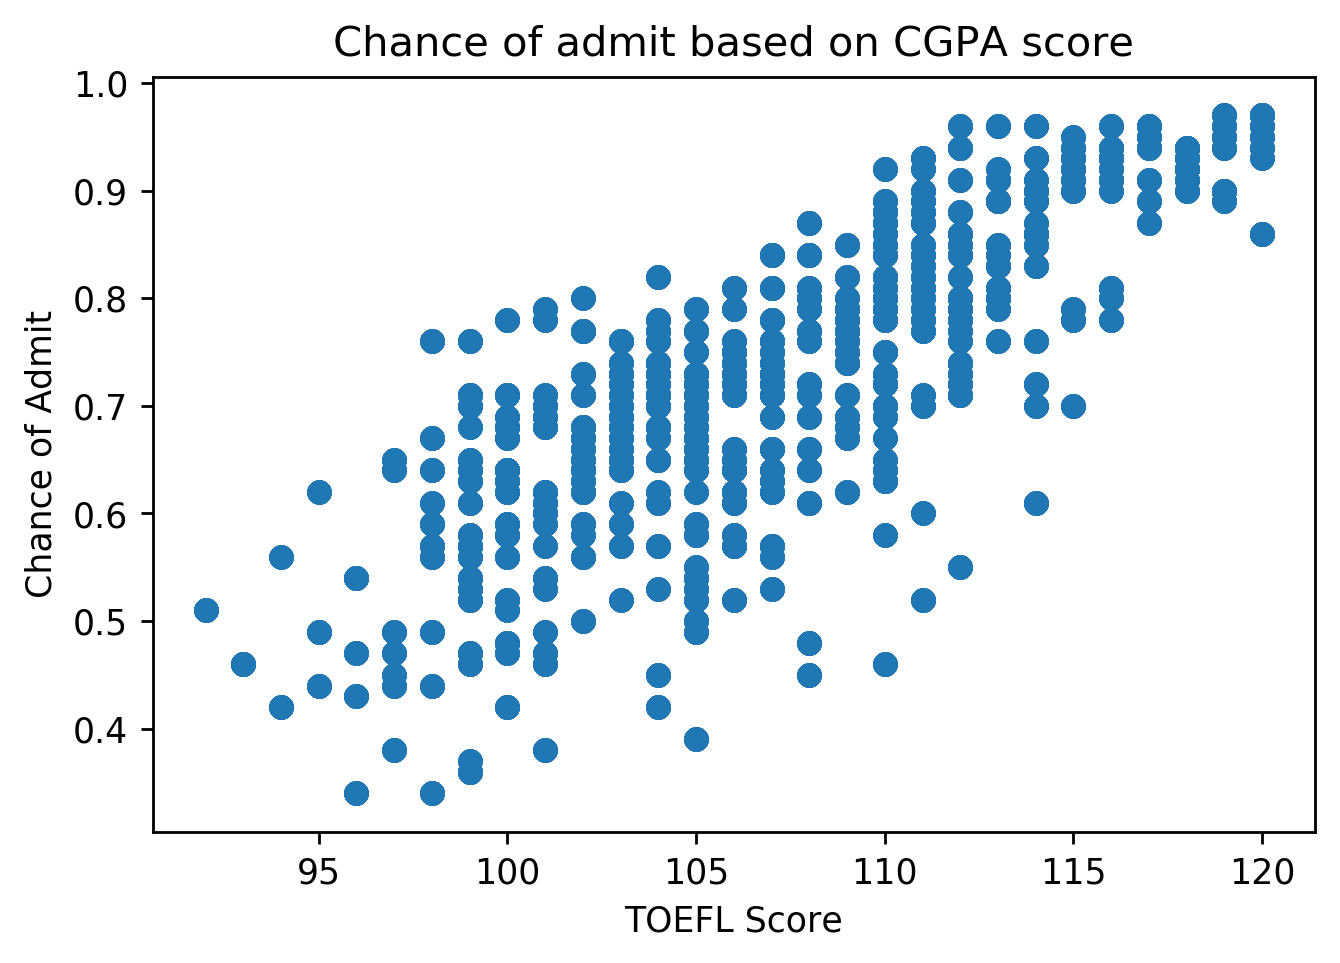

In [17]:
plt.scatter(dataset['TOEFL Score'], dataset["Chance of Admit "])
plt.title("Chance of admit based on CGPA score")
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
mpl.rcParams['figure.dpi'] = 250
plt.show()

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


### Super Classs Definition

In [18]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [19]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    w = np.zeros([1,1])
    
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T
        return self.w
    
    # apply the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        y = X1 @ self.w
        return y

### Least Mean Squares

In [20]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    
    w = np.zeros([1,1])
    alpha = 0.01
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        X1 = np.hstack((np.ones(1),x))
        N = X1.shape[0]
        if self.w is None:
            self.w = np.zeros(N)
        y = self.w @ X1
        self.w -= self.alpha * (y - t) * X1
    
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        y = X1 @ self.w
        N = X1.shape[0]
        y.shape = (N,1)
        return y
        

### Usage Examples

In [21]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

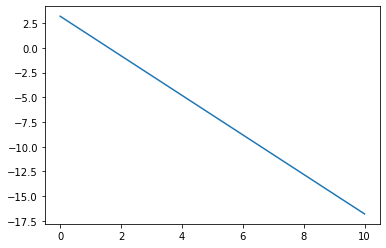

In [22]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

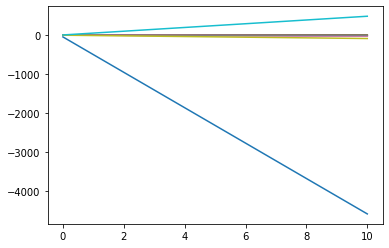

In [23]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

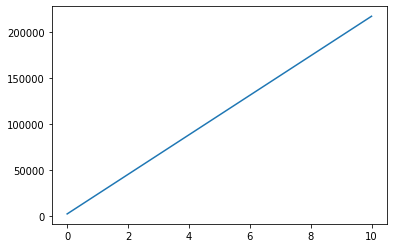

In [24]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


We will nor progress applying the LS and LMS methods declared so far. Before we process the data however, we need to get the input and the target variables so that we can apply the methods and get the results we need.

Based on the heatmap plotted before, we have 3 variables who are strong contenders for determing the chance to get an admit, which is our target variable in this case.

In [25]:
# Extracting GRE Scores
dataset['GRE Score'] = dataset['GRE Score'].astype('float64')
dataset['TOEFL Score'] = dataset['TOEFL Score'].astype('float64')
X = dataset[['GRE Score', 'TOEFL Score', 'CGPA']].copy()

In [26]:
T = dataset['Chance of Admit '].copy()

Since the scores are mapped on different scales, we will be normalising the data by implementing the Min Max Scaler function

In [27]:
# Normalise both columns so as to be able to compare the data
def normalize_list(arr):
    max_value = max(arr)
    min_value = min(arr)
    for i in range(len(arr)):
        arr[i] = (arr[i] - min_value) / (max_value - min_value)
    return arr

Preparing the training and test datasets to test the model and normalising the training and test dataset separately

In [28]:
# Splitting data into 80:20 portions

train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
T_train, T_test = T[:train_pct_index], T[train_pct_index:]

In [29]:
X_norm = np.empty([X_train.shape[0],X_train.shape[1]])
for i in range(X_train.shape[1]):
    X_temp = np.array(X_train.iloc[:, i]).copy()
    X_norm[:, i] = normalize_list(X_temp)

In [30]:
# Normalised training data
X_norm

array([[0.94      , 0.92857143, 0.91346154],
       [0.68      , 0.53571429, 0.66346154],
       [0.52      , 0.42857143, 0.38461538],
       ...,
       [0.22      , 0.42857143, 0.34935897],
       [0.48      , 0.46428571, 0.26923077],
       [0.62      , 0.53571429, 0.52564103]])

In [31]:
X_tnorm = np.empty([X_test.shape[0],X_test.shape[1]])
for i in range(X_test.shape[1]):
    X_ttemp = np.array(X_test.iloc[:, i]).copy()
    X_tnorm[:, i] = normalize_list(X_ttemp)

In [32]:
# Normalised Test Data
X_tnorm

array([[0.64      , 0.64285714, 0.58974359],
       [0.88      , 0.85714286, 0.87820513],
       [0.96      , 0.82142857, 0.77884615],
       ...,
       [0.8       , 1.        , 0.88461538],
       [0.44      , 0.39285714, 0.5224359 ],
       [0.74      , 0.75      , 0.71794872]])

#### Applying the Least Squares Linear Regression Model

In [33]:
# Using Linear Regression Class - Least Squares method
ls = LinearRegress()
ls.train(X_norm, T_train)
T_pred = ls.use(X_tnorm)


In [34]:
T_pred = pd.Series(T_pred)

In [35]:
# Reset index after the split
T_test = T_test.reset_index(drop=True)

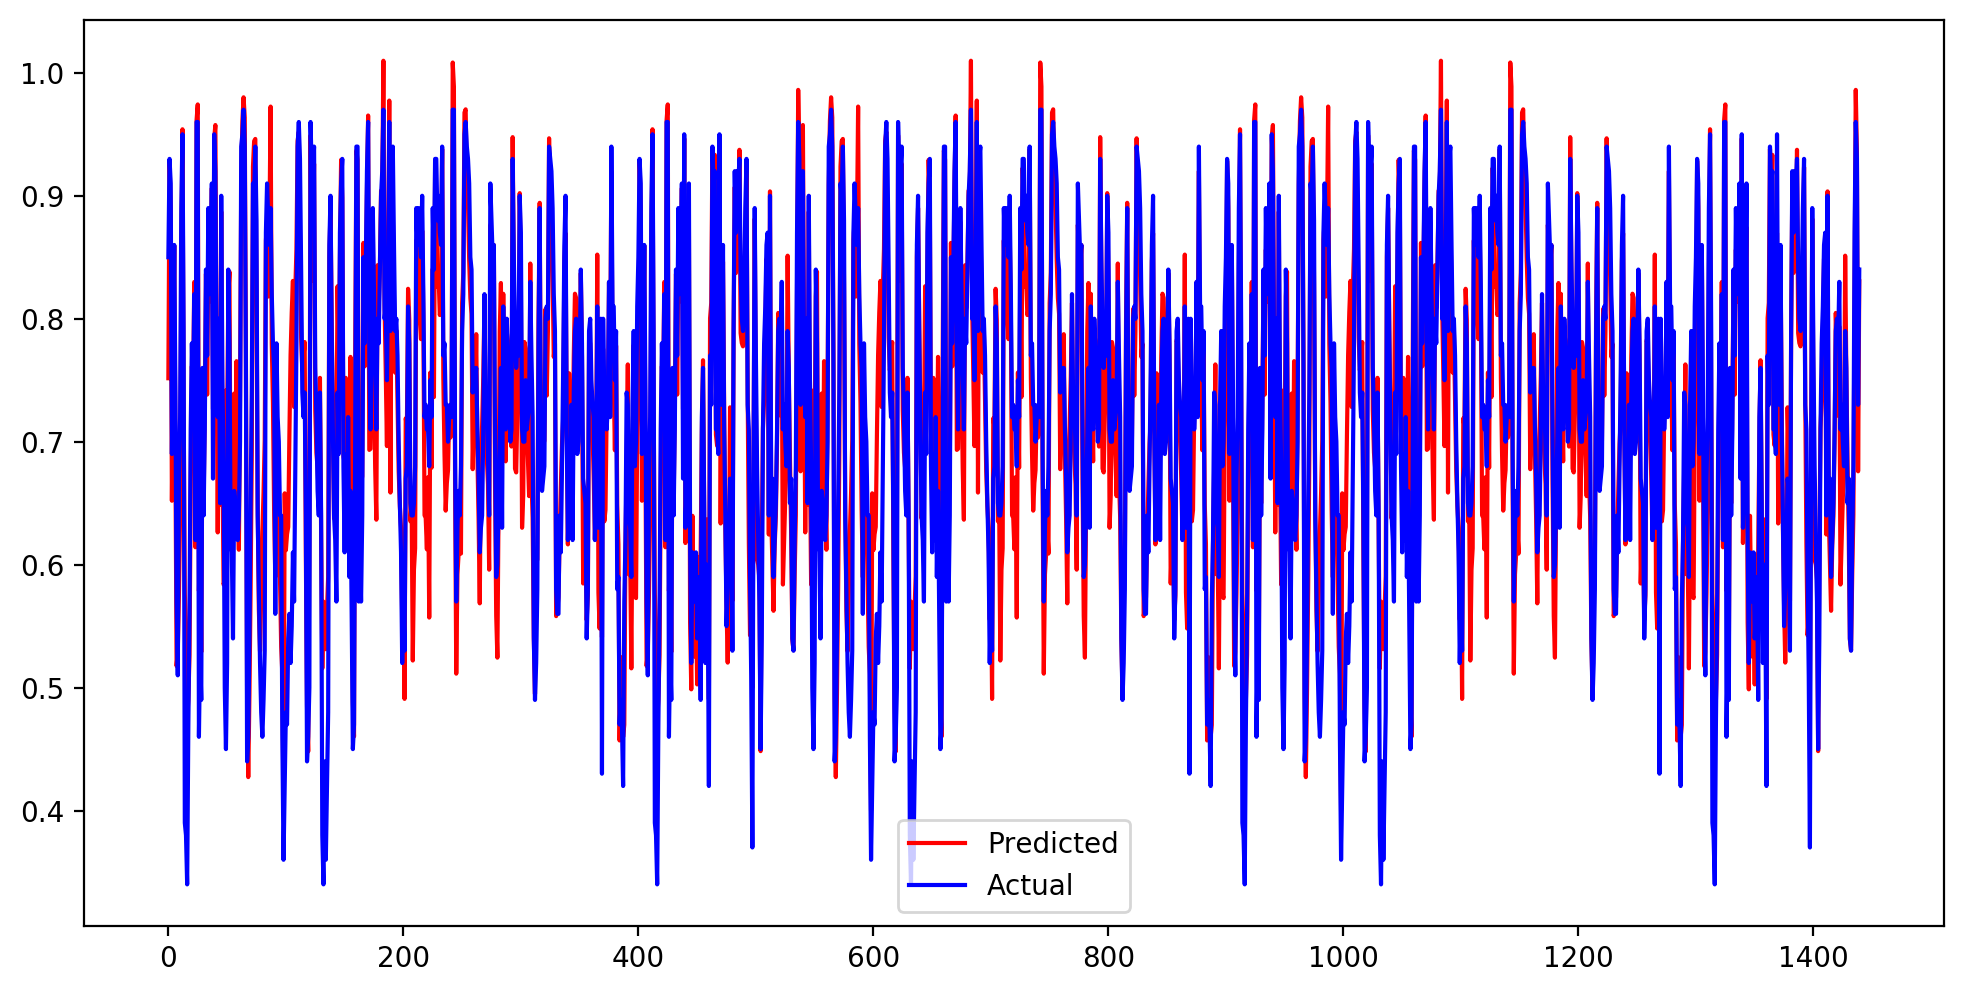

In [36]:
fig=plt.figure(figsize=(12, 6), dpi=200)
plt.plot(T_pred,c='red',label="Predicted")
plt.plot(T_test,c='blue',label="Actual")
plt.legend()
plt.show()

#### Interim Conclusion

We can see from the above graph that the predicted data closely matches the test results, thus coniforming that the model is sound and can be used to make future predictions

In [37]:
X_norm

array([[0.94      , 0.92857143, 0.91346154],
       [0.68      , 0.53571429, 0.66346154],
       [0.52      , 0.42857143, 0.38461538],
       ...,
       [0.22      , 0.42857143, 0.34935897],
       [0.48      , 0.46428571, 0.26923077],
       [0.62      , 0.53571429, 0.52564103]])

In [38]:
X_test = X_test.reset_index(drop=True)
X_tnorm

array([[0.64      , 0.64285714, 0.58974359],
       [0.88      , 0.85714286, 0.87820513],
       [0.96      , 0.82142857, 0.77884615],
       ...,
       [0.8       , 1.        , 0.88461538],
       [0.44      , 0.39285714, 0.5224359 ],
       [0.74      , 0.75      , 0.71794872]])

In [39]:
T_test

0       0.85
1       0.93
2       0.91
3       0.69
4       0.77
        ... 
1435    0.87
1436    0.96
1437    0.93
1438    0.73
1439    0.84
Name: Chance of Admit , Length: 1440, dtype: float64

#### Applying Least Mean Square Linear Regression  Model with a leanring rate of 0.01

In [40]:
# Using Least Mean Square method

lms = LMS(0.01)
lms.train(X_norm,T_train)
T_pred_lms = lms.use(X_tnorm)

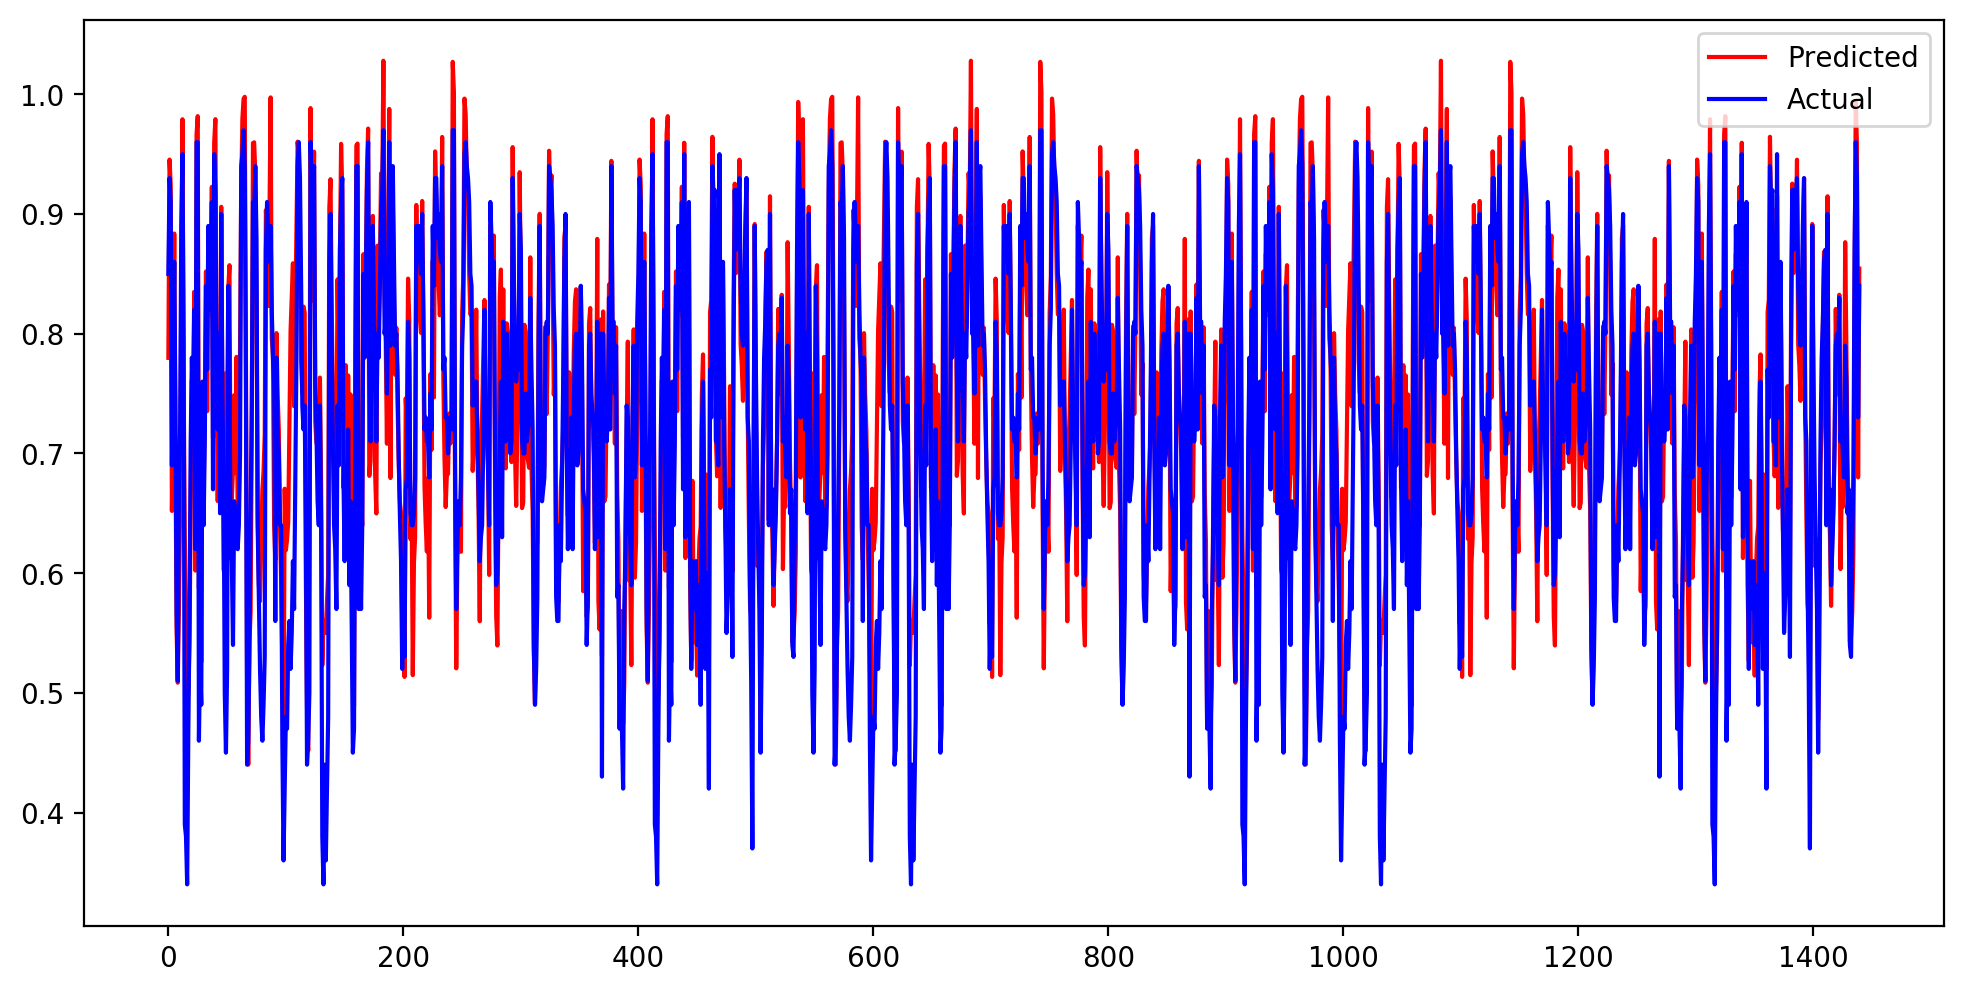

In [41]:
fig=plt.figure(figsize=(12, 6), dpi=200)
plt.plot(T_pred_lms,c='red',label="Predicted")
plt.plot(T_test,c='blue',label="Actual")
plt.legend()
plt.show()

#### Interim Conclusion

We can see from the above graph that the predicted data closely matches the test results, thus coniforming that the model is sound and can be used to make future predictions

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

This was a n extremely intriguing challenge. Having worked on the basics on Linear Regression implementation using the scikit learn package. Understanding the inner working of the Linear Regression gives some insight into how the data is processed and the math that goes into it.

The 2 techniques discussed so far when calculating Linear Regression were
a. Least Square Method
The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined systems, i.e., sets of equations in which there are more equations than unknowns. "Least squares" means that the overall solution minimizes the sum of the squares of the residuals made in the results of every single equation.

b. Least Mean Square Method (LMS)
The purpose of the LMS is to reduce the mean squared error. LEast squares work very well when the data is small. However when the data is sufficiently large, it can be too computationally intensive. To avoid this problem, we can start with a small random weight and progress accordingly by taking one observation at a time. By setting an initial leanring rate, it is simple to control the flow of data.

One other method of calculating how accurate the models created using these two methods is calculating the root mean squared error



In [42]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

In [43]:
print("Least Square Root Mean Square Error Calculation: {}".format(rmse(T_test, T_pred)))

Least Square Root Mean Square Error Calculation: 2.4047795940063046


In [44]:
T_pred_lms = T_pred_lms.reshape(T_pred_lms.shape[0])
print("Least Mean Square Root Mean Square Error Calculation: {}".format(rmse(T_test, T_pred_lms)))

Least Mean Square Root Mean Square Error Calculation: 2.5543360144710445


We can see from the above calculations that the RMSE calculated for Least Squares is much better than the one calculated for LMS

# References

Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

Q1. what is the most and least significant features for your data.

a. Most significant
- GRE Score
- TOEFL Score
- CGPA

b. Least significant
- Research

Q2. what are the consequences if you remove those features from the model? (Show your work!)

In [45]:
X_EC = dataset[['Research']].copy()
T_EC = dataset['Chance of Admit '].copy()

#### Running the heatmap on the correleation matrix to aanlyse the data again to confirm that having research experience alone has not bearning on one's chance of getting admitted

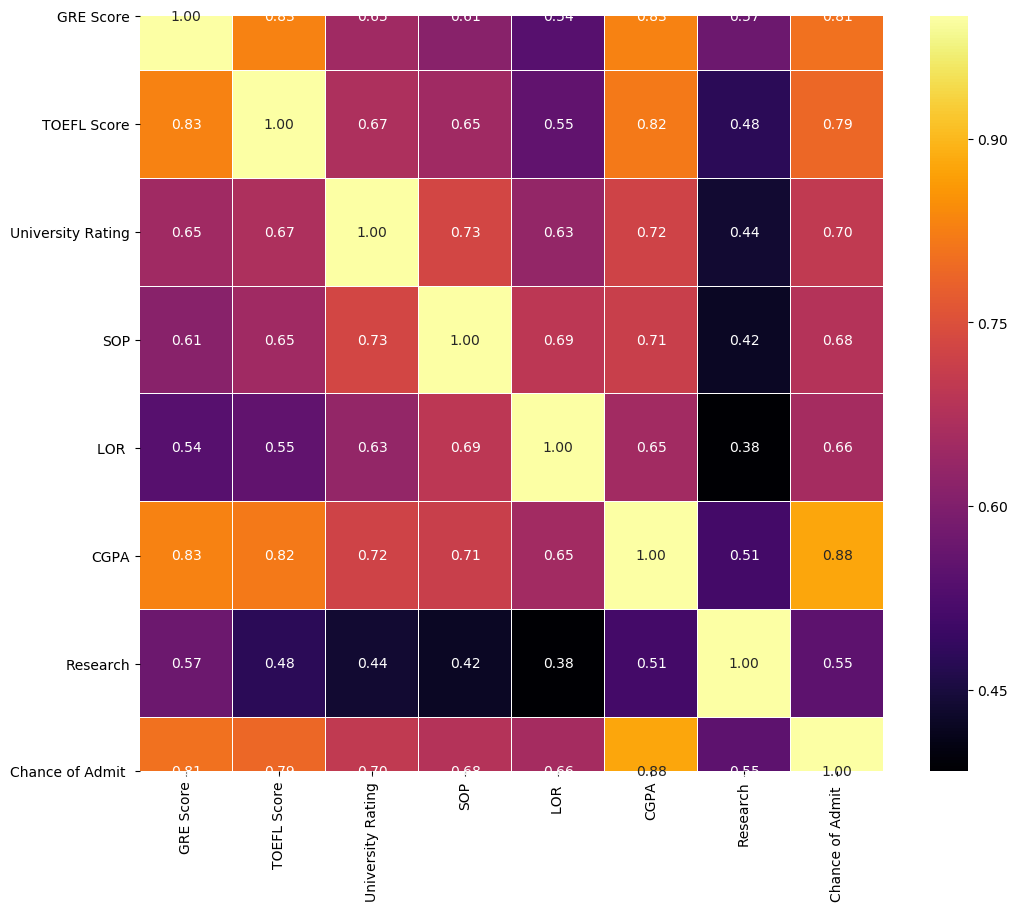

In [46]:
fig,ax = plt.subplots(figsize=(12, 10), dpi=100)
sns.heatmap(dataset.corr(), ax=ax, annot=True, linewidths=0.01, fmt= '.2f',cmap="inferno")
plt.show()

Splitting data into 80 20 partitions for processing

In [47]:
train_pct_index = int(0.8 * len(X_EC))
X_ECtrain, X_ECtest = X_EC[:train_pct_index], X_EC[train_pct_index:]
T_ECtrain, T_ECtest = T_EC[:train_pct_index], T_EC[train_pct_index:]

In [48]:
# Using Linear Regression with LS
ls = LinearRegress()
ls.train(X_ECtrain, T_ECtrain)
T_ECpred = ls.use(X_ECtest)

In [49]:
T_ECtest = T_ECtest.reset_index(drop=True)

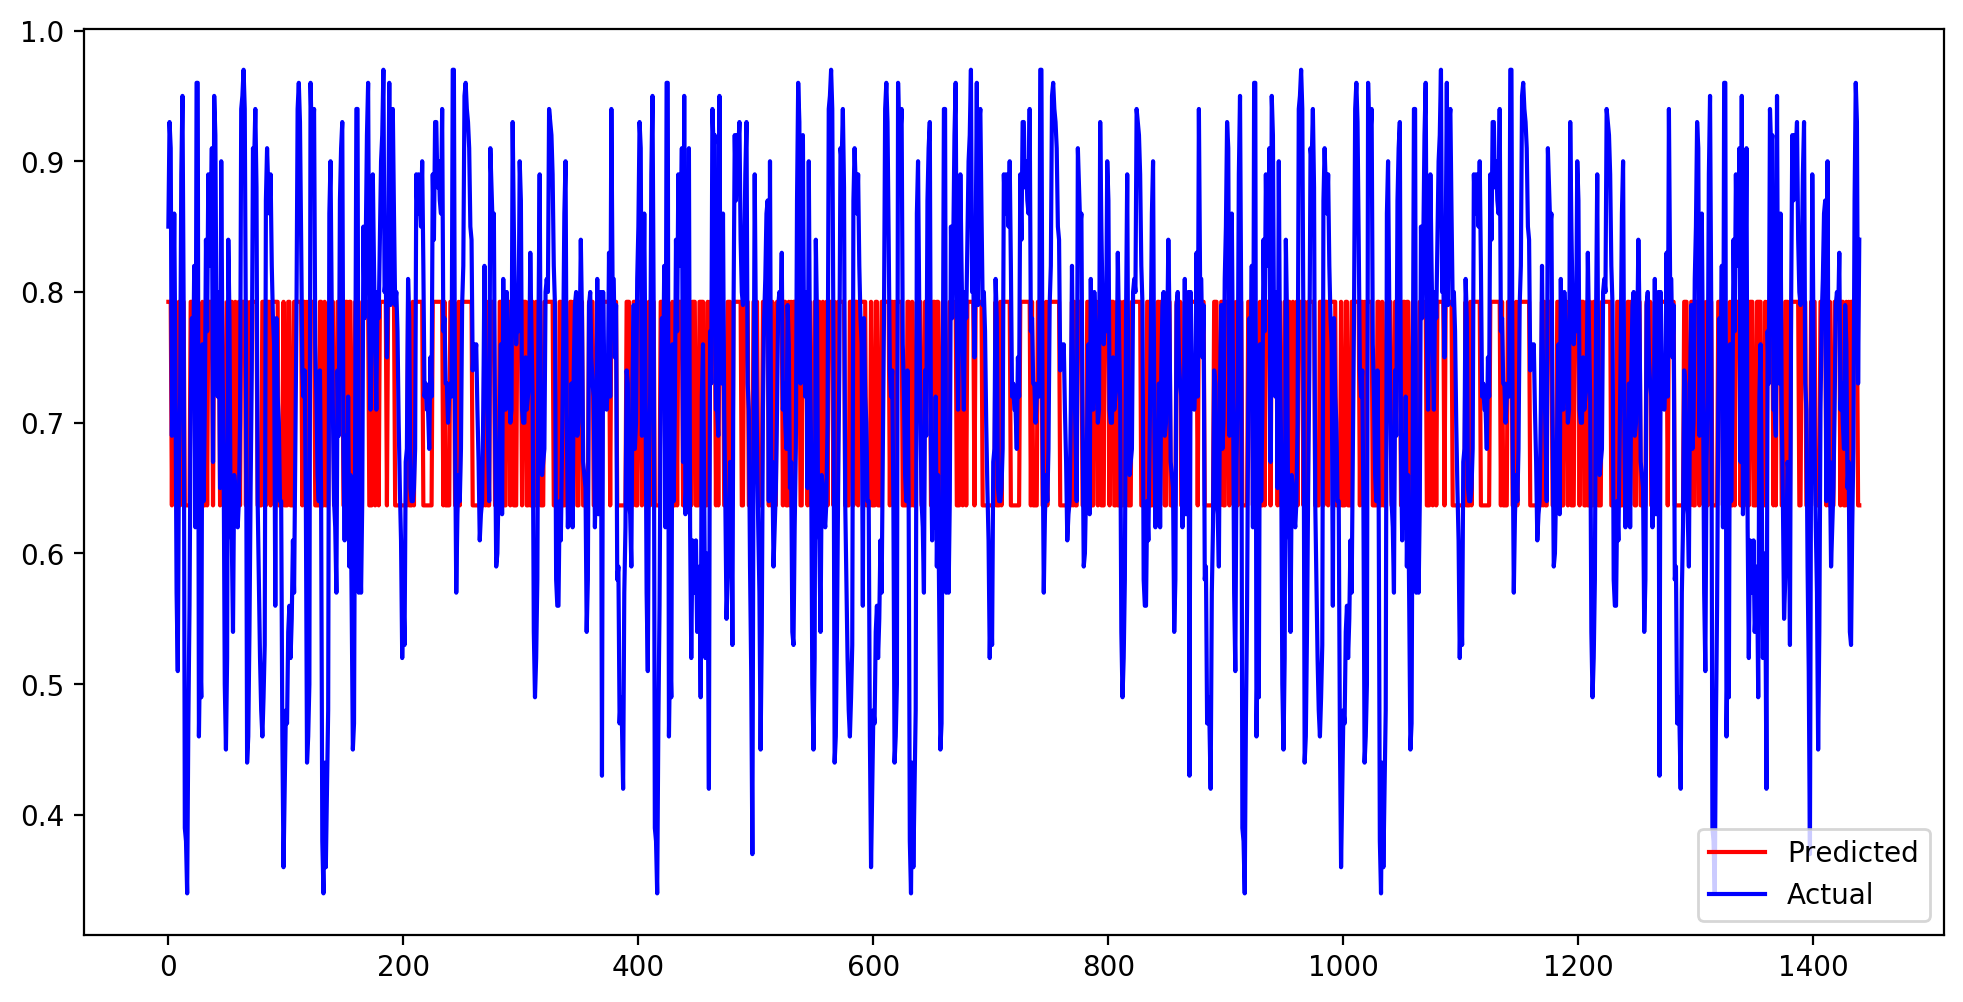

In [50]:
fig=plt.figure(figsize=(12, 6), dpi=200)
plt.plot(T_ECpred,c='red',label="Predicted")
plt.plot(T_ECtest,c='blue',label="Actual")
plt.legend()
plt.show()

#### Interim Conclusion

We can see from the above data due to the wide gap between the demands of research experiece and the chance of getting admitted is very low.

Q3 - produce residual plots and observe the patterns for the goodness of fit

We can see from the plot below the different in the accuracy of the prediction had the least significant attribute been used for estimating the chance of getting admitted into a college

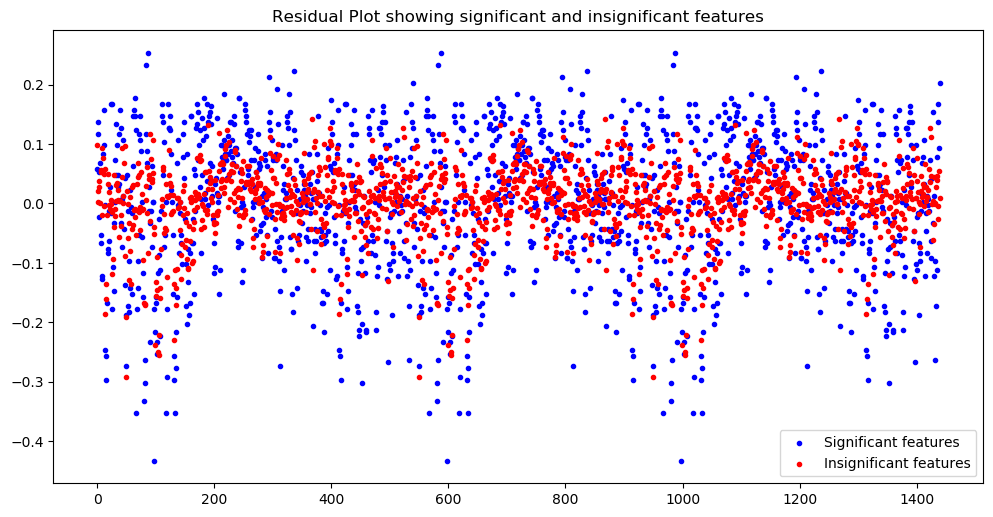

In [51]:
T_RPred = T_ECpred
Acc_R = T_ECtest - T_pred
Acc_T = T_test - T_RPred
number = np.arange(len(T_ECtest))

# Plot the residual plot
fig=plt.figure(figsize=(12, 6), dpi= 100, facecolor='w')
plt.scatter(number,Acc_T,marker='.',color='blue',label='Significant features')
plt.scatter(number,Acc_R,marker='.',color='red',label='Insignificant features')
plt.title("Residual Plot showing significant and insignificant features")
plt.legend()
plt.show()

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [52]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
